In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

##EDA

In [ ]:
img = image.load_img("/content/drive/MyDrive/ASSIGNMENT DATASET/toy_train/circle/101.jpg")

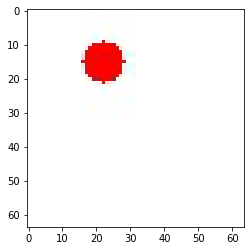

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/ASSIGNMENT DATASET/toy_train/circle/101.jpg").shape

(64, 64, 3)

In [ ]:
train_rescale = ImageDataGenerator(rescale = 1/255)
valid_rescale = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train_rescale.flow_from_directory("/content/drive/MyDrive/ASSIGNMENT DATASET/toy_train",
                                          batch_size = 50,target_size = (64,64),
                                          class_mode = "binary")
valid_dataset = valid_rescale.flow_from_directory("/content/drive/MyDrive/ASSIGNMENT DATASET/toy_val",
                                          batch_size = 50, target_size = (64,64),
                                          class_mode = "binary")



Found 1000 images belonging to 2 classes.
Found 190 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'circle': 0, 'rectangle': 1}

In [ ]:
valid_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##MODEL



In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (64,64,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation = "relu"),
                                    tf.keras.layers.Dense(1,activation = "sigmoid")])





                                    

In [ ]:
model.compile(loss = "binary_crossentropy",optimizer='adam',metrics = ['accuracy'])

In [ ]:
model_fit = model.fit_generator(train_dataset,
                     steps_per_epoch =len(train_dataset),
                     epochs = 10,
                     validation_data = valid_dataset,
                     validation_steps=len(valid_dataset))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


20/20 [==============================] - 4s 154ms/step - loss: 0.0892 - accuracy: 0.9720 - val_loss: 0.0350 - val_accuracy: 0.9947
Epoch 2/10
20/20 [==============================] - 3s 143ms/step - loss: 0.0127 - accuracy: 0.9980 - val_loss: 0.0060 - val_accuracy: 0.9947
Epoch 3/10
20/20 [==============================] - 3s 142ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 3s 141ms/step - loss: 4.3006e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 3s 143ms/step - loss: 2.7833e-04 - accuracy: 1.0000 - val_loss: 9.7750e-04 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 3s 140ms/step - loss: 2.2429e-04 - accuracy: 1.0000 - val_loss: 8.7937e-04 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 3s 145ms/step - loss: 1.8401e-04 - accuracy: 1.0000 - val_loss: 8.0632e-04 - val_accura

##TESTING

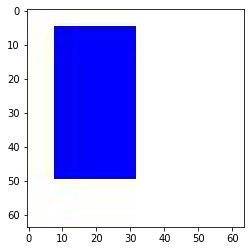

It's a Rectangle


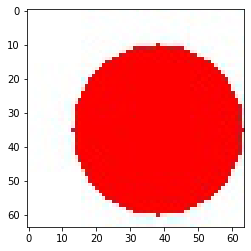

It's a Circle


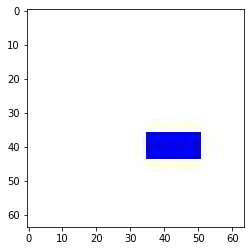

It's a Rectangle


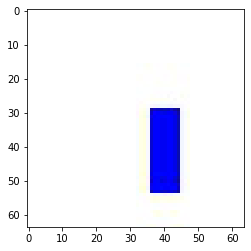

It's a Rectangle


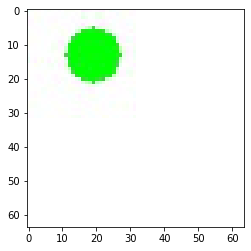

It's a Circle


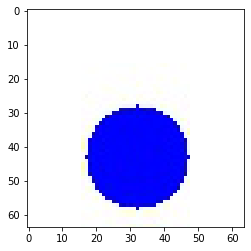

It's a Circle


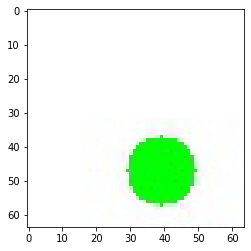

It's a Circle


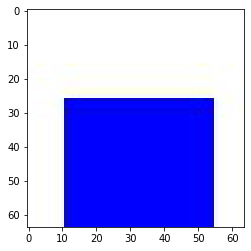

It's a Rectangle


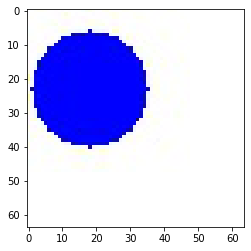

It's a Circle


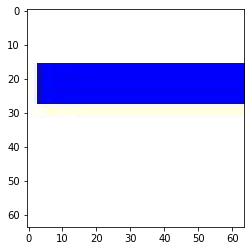

It's a Rectangle


In [ ]:
# Removed 5-5 images of circle and rectangle from validation dataset and used it for Testing

test_dir = "/content/test"

for each_image in os.listdir(test_dir):
  img = image.load_img(test_dir +'/' + each_image )
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X,axis = 0)
  images = np.vstack([X])
  val = model.predict(images)

  if val == 0:
    print("It's a Circle")
  else:
    print("It's a Rectangle")  



